A álgebra linear é o ramo da matemática que calcula espaços vetoriais. 

# Vetores

Vetores são pontos em um espaço de dimensão finita

In [1]:
from typing import List
import matplotlib.pyplot as plt
%matplotlib inline

Vector = List[float]
height_weight_age = [70, #Polegadas
                    170, #libras
                    40]  #anos
grades = [95, #Teste1
         80,  #Teste2
         75,  #Teste3
         65]  #Teste4

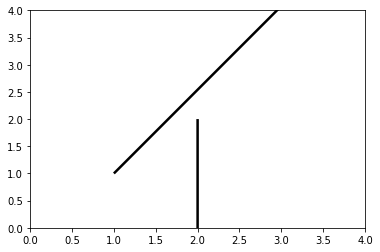

In [2]:
fig, ax = plt.subplots()
    
x_pos = [1, 2]
y_pos = [1, 2]
x_direct = [1, 0]
y_direct = [1, -1]
    
ax.quiver(x_pos, y_pos, x_direct, y_direct, scale=1)
ax.axis([0, 4, 0, 4])
    
plt.show()

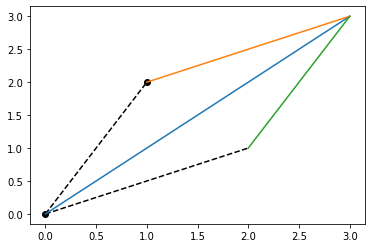

In [3]:
fig, ax = plt.subplots()
    
ax.plot([0,1],[0,2],'k--', marker='o')
ax.plot([0,2],[0,1],'k--')
ax.plot([0,3],[0,3])
ax.plot([1,3],[2,3])
ax.plot([2,3],[1,3])
    
plt.show()

In [4]:
def add(v: Vector, w: Vector) -> Vector:
    """Soma os elementos correspondentes"""
    assert len(v) == len(w), 'vectors must be the same length'
    return [v_i + w_i for v_i, w_i in zip(v, w)]

In [5]:
assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]
add([1, 2, 3], [4, 5, 6])

[5, 7, 9]

In [6]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtrai os elementos correspondentes"""
    assert len(v) == len(w), 'verifica se os vetores tem o mesmo espaço'
    return [v_i - w_i for v_i, w_i in zip(v, w)]

In [7]:
assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3], "ERRORRRRR!!!"
subtract([5, 7, 9], [4, 5, 6])

[1, 2, 3]

In [8]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Soma todos os elementos correspondentes"""
    #Verifica se todos os elementos não estão vazios 
    assert vectors, 'Vetor Vazio!!!'
    
    #Verifica se os vetores são do mesmo tamanho
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'Vetores com tamanhos diferentes !!!!'
    
    #O elemento de n° i do resultado é a soma de todo vector[i]
    return [sum(vector[i] for vector in vectors)
           for i in range(num_elements)]

In [9]:
assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]
vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) 

[16, 20]

In [10]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplica cada elemento por c"""
    assert v, 'Vetor vazio !!!!'
    assert type(c) == float or type(c) == int, 'O multiplicador tem que ser um número'
    return [c * v_i for v_i in v]

In [11]:
assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]
scalar_multiply(2, [1, 2, 3])

[2, 4, 6]

In [12]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computa a média dos elementos"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [13]:
assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]
vector_mean([[1, 2], [3, 4], [5, 6]])

[3.0, 4.0]

In [14]:
# Produto escalar de dois vetores 
def dot(v: Vector, w: Vector) -> float:
    """Computa v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "Vetores não tem os mesmos tamanhos"
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

In [15]:
assert dot([1, 2, 3], [4, 5, 6]) == 32 #1* 4 + 2 * 5 + 3* 6

In [16]:
#Soma dos quadrados

def sum_of_squares(v: Vector) -> float:
    """Retorna v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [17]:
assert sum_of_squares([1, 2, 3]) == 14
sum_of_squares([1, 2, 3]) 

14

In [18]:
import math

In [19]:
def magnitude(v: Vector) -> float:
    """Retorna a hipotenusa o comprimeto de v"""
    return math.sqrt(sum_of_squares(v))

In [20]:
assert magnitude([3, 4]) == 5

In [21]:
def square_distance(v: Vector, w: Vector) -> float:
    """Computa (v_1 - w_1) ** 2 + ... + (v_1 - w_1) ** 2"""
    return sum_of_squares(subtract(v, w))

In [22]:
def distance(v: Vector, w: Vector) -> float:
    """Computa a distância entre v e w"""
    return math.sqrt(square_distance(v, w))

# Matriz

In [24]:
# Alias de tipo
Matrix = List[List[float]]

In [25]:
A = [[1, 2, 3], 
    [4, 5, 6]]
B = [[1, 2],
    [3, 4],
    [5, 6]]

In [26]:
A

[[1, 2, 3], [4, 5, 6]]

In [27]:
B

[[1, 2], [3, 4], [5, 6]]

In [30]:
# A matriz tem as linhas
len(A)

2

In [31]:
# A matriz tem as colunas
len(A[0])

3

In [34]:
from typing import Tuple

def shape(A: List[List[float]]) -> Tuple[int, int]:
    """Retorna (n° de linhas de A, n° de colunas de A)"""
    n_linhas = len(A)
    n_colunas = len(A[0]) if A else 0 # número de elementos na primeira linha
    return n_linhas, n_colunas

assert shape(B) == (3, 2)

Cada linha da matriz n x k é um vetor de comprimento<b> k

Cada coluna é um vetor de comprimento <b>n

In [38]:
Matrix = List[List[float]]

def get_row(A: Matrix, i: int) -> Vector:
    """Retorna a linha i de A (como um Vector)"""
    return A[i] #A[i] já está na linha i
assert get_row(A, 1) == [4, 5, 6]

In [42]:
A[1]

[4, 5, 6]

In [41]:
def get_column(A: Matrix, j: int) -> Vector:
    """Retorna a coluna j de A (como um Vector)"""
    return [A_i[j]           #elemento j da linha A_i
           for A_i in A]     #para cada linha A_i
get_column(A, 0)

[1, 4]

In [72]:
from typing import Callable

def make_matrix(n_linhas: int,
               n_colunas: int,
               entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Retorna uma matriz n_linhas X n_colunas cuja entrada (i, j)
    é entry_fn(i, j)
    """
    print(entry_fn)
    return [[entry_fn(i, j)               #com i, crie uma lista
            for j in range(n_colunas)]    # [entry_fn(i,0), .....]
           for i in range(n_linhas)]      #crie uma lista para cada i

In [71]:
def identity_matrix(n: int) -> Matrix:
    """Retorn a matriz de identidade n x n"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)
identity_matrix(5)

<function identity_matrix.<locals>.<lambda> at 0x0000020F09FC0E50>


[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

1° - Podemos utilizar uma matriz para representar um conjunto de dados com múltiplos vetores, considerando cada vetor como uma linha da matriz. Por exemplo, temos a altura, o peso e a idade de mil pessoas e colcamos esses dados em uma matriz 1000 X 3

2° - Podemos utilizar uma matriz n X k para representar uma função linear que mapeia vetores dimensionais k com relação a vetores dimensionais n 

3° - As matrizes podem representar relações binárias